In [179]:
import pandas as pd

# Load file
df = pd.read_csv(r"C:\Users\mgag2\OneDrive\Documentos\Data\Bank+Customer+Churn\Bank_Churn.csv")

In [181]:
#Check data with custom function based on describe
from custom_summary import custom_describe
custom_describe(df)

,Column,Type,Count,Unique,Missing,Min,Max,Average
0,CustomerId,int64,10000,10000,0,15565701.00,15815690.00,1.569094e+07
1,Surname,object,10000,2932,0,NaN,NaN,NaN
2,CreditScore,int64,10000,460,0,350.00,850.00,6.505288e+02
3,Geography,object,10000,3,0,NaN,NaN,NaN
4,Gender,object,10000,2,0,NaN,NaN,NaN
5,Age,int64,10000,70,0,18.00,92.00,3.892180e+01
6,Tenure,int64,10000,11,0,0.00,10.00,5.012800e+00
7,Balance,float64,10000,6382,0,0.00,250898.09,7.648589e+04
8,NumOfProducts,int64,10000,4,0,1.00,4.00,1.530200e+00
9,HasCrCard,int64,10000,2,0,0.00,1.00,7.055000e-01


In [183]:
df.drop_duplicates(inplace=True)

In [185]:
print(len(df))

10000


---
#### This dataset has no missing values or duplicates
---

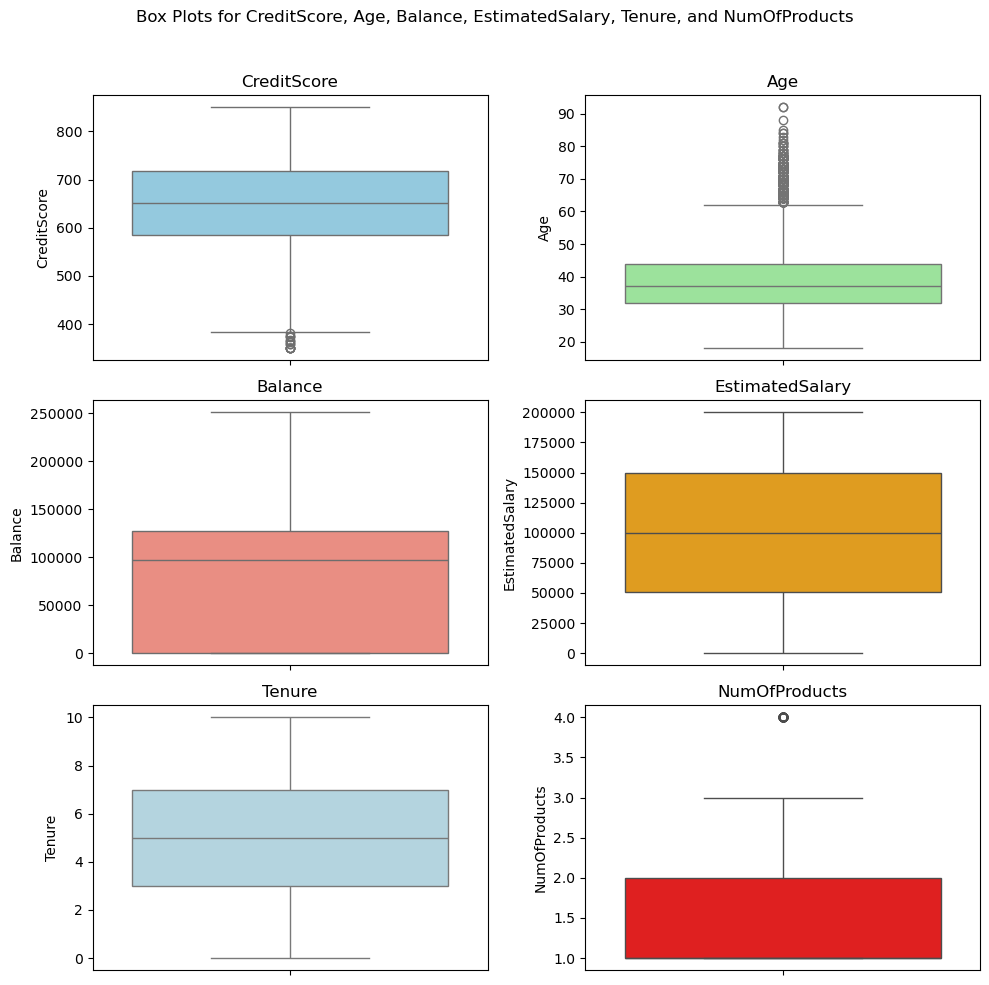

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))  # 2 rows, 2 columns
fig.suptitle('Box Plots for CreditScore, Age, Balance, EstimatedSalary, Tenure, and NumOfProducts', fontsize=12)

# Create individual box plots for each variable
sns.boxplot(ax=axes[0, 0], y=df['CreditScore'], color='skyblue')
axes[0, 0].set_title('CreditScore')

sns.boxplot(ax=axes[0, 1], y=df['Age'], color='lightgreen')
axes[0, 1].set_title('Age')

sns.boxplot(ax=axes[1, 0], y=df['Balance'], color='salmon')
axes[1, 0].set_title('Balance')

sns.boxplot(ax=axes[1, 1], y=df['EstimatedSalary'], color='orange')
axes[1, 1].set_title('EstimatedSalary')

sns.boxplot(ax=axes[2, 0], y=df['Tenure'], color='lightblue')
axes[2, 0].set_title('Tenure')

sns.boxplot(ax=axes[2, 1], y=df['NumOfProducts'], color='red')
axes[2, 1].set_title('NumOfProducts')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect to make space for the suptitle

# Show the plot
plt.show()

----
#### The Credit Score, Age, and NumOfProducts graphs appear to have outliers, but the values are feasible. Credit scores typically range between 300 and 850, and the minimum value in this dataset is 350. The maximum age is 92, which is not unrealistic. The maximun number of products is 4 wich is something credible.
----

In [189]:
# One-hot encode the categorical columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [191]:
print(df.columns.tolist())

['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


In [211]:
print(f'Number of columns: ',df.shape[1])

Number of columns:  14


----
#### Checking normality on numerical features
----

In [213]:
# Creating a function for ploting Histogram + KDE and Q-Q Plot
import scipy.stats as stats

def plot_normality_checks(data, column):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Histogram + KDE
    sns.histplot(data[column], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"Histogram of {column}")

    # Q-Q Plot
    stats.probplot(data[column], dist="norm", plot=axes[1])
    axes[1].set_title(f"Q-Q Plot of {column}")

    plt.tight_layout()
    plt.show()

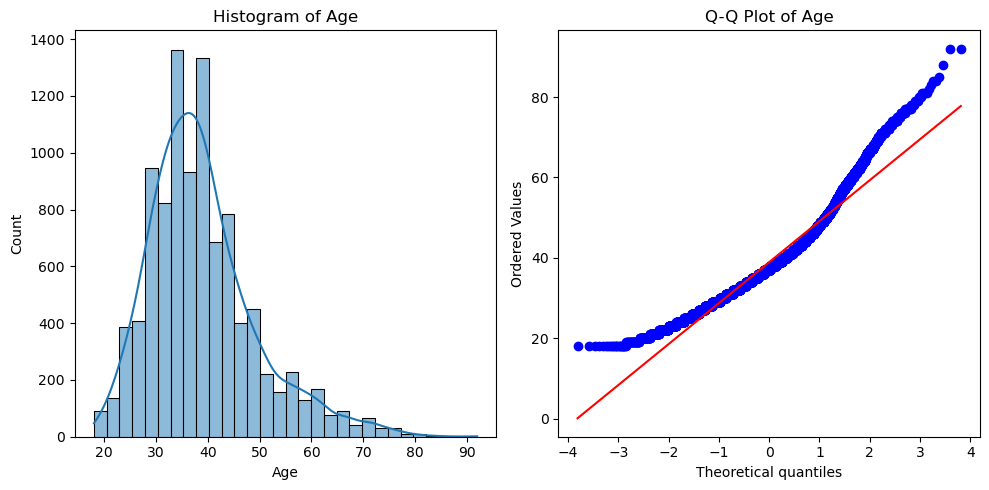

In [215]:
plot_normality_checks(df, 'Age') 

In [63]:
# Checking Normality

from scipy.stats import ks_2samp

stat, p = ks_2samp(df['Age'], np.random.normal(df['Age'].mean(), df['Age'].std(), len(df['Age'])))
print(f"KS Test: Statistics={stat}, p-value={p}")

KS Test: Statistics=0.1019, p-value=1.347358032928127e-45


----

#### In the first graph, we observe a left-skewed distribution. Additionally, in the Q-Q plot, the values deviate from the straight line at the extremes, indicating departures from normality.

----

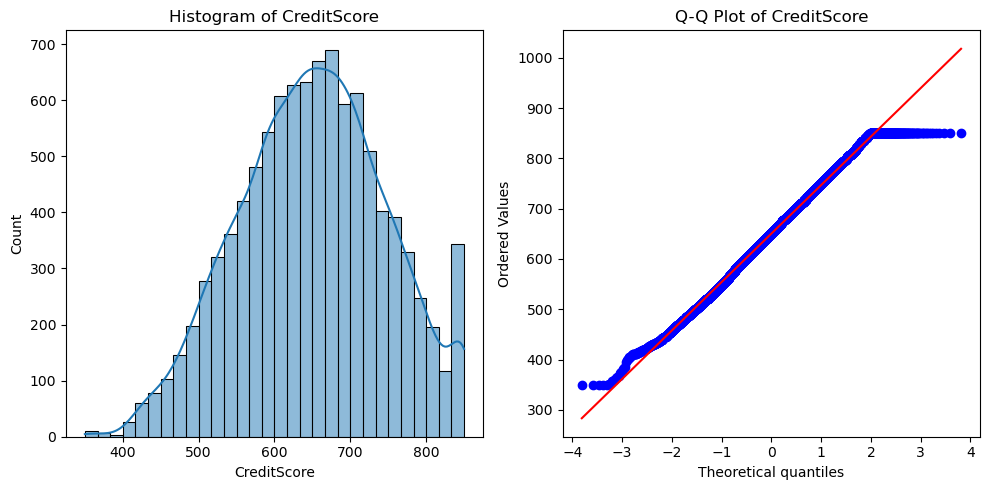

In [93]:
plot_normality_checks(df, 'CreditScore') 

In [67]:
stat, p = ks_2samp(df['CreditScore'], np.random.normal(df['CreditScore'].mean(), df['CreditScore'].std(), len(df['CreditScore'])))
print(f"KS Test: Statistics={stat}, p-value={p}")

KS Test: Statistics=0.0184, p-value=0.06771054835137846


----
#### Aside from the right tail, the graph closely follows a normal distribution with a slight right skew. The Q-Q plot shows most values aligning with the reference line, except for those above the second quantile. The KS test results in a p-value greater than 0.05, indicating no strong evidence to reject the hypothesis that the data follows a normal distribution.
----

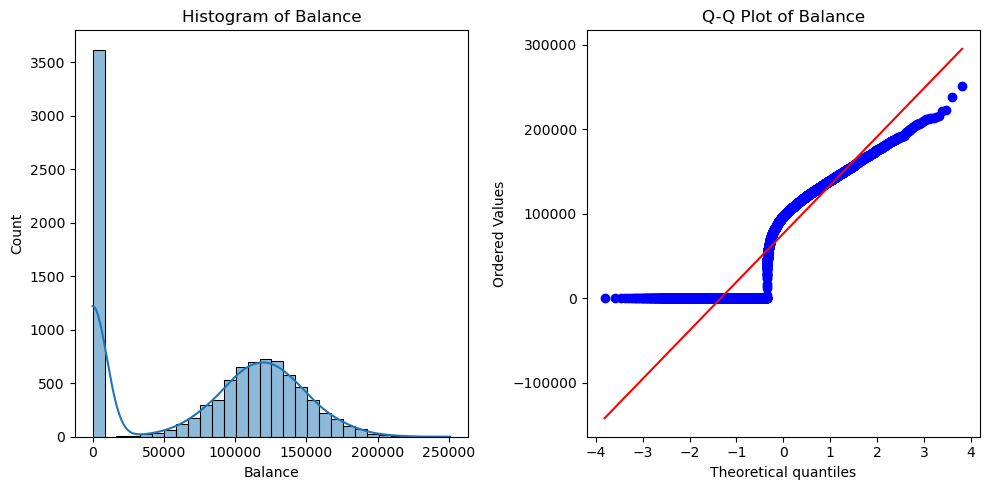

In [95]:
plot_normality_checks(df, 'Balance') 

In [75]:
stat, p = ks_2samp(df['Balance'], np.random.normal(df['Balance'].mean(), df['Balance'].std(), len(df['Balance'])))
print(f"KS Test: Statistics={stat}, p-value={p}")

KS Test: Statistics=0.2489, p-value=2.600224294394847e-272


----
#### The large bar on the left side of the first chart suggests that this value might warrant a separate column. The Q-Q plot clearly indicates a deviation from normality, which is further confirmed by the KS test.
----

In [219]:
# Create a new column to indicate whether the customer has a zero balance
df['HasZeroBalance'] = (df['Balance'] == 0).astype(int)

# Verify the new column
print(df[['Balance', 'HasZeroBalance']].head(10))

     Balance  HasZeroBalance
0       0.00               1
1   83807.86               0
2  159660.80               0
3       0.00               1
4  125510.82               0
5  113755.78               0
6       0.00               1
7  115046.74               0
8  142051.07               0
9  134603.88               0


In [221]:
print(f'Number of Columns: ', df.shape[1])

Number of Columns:  15


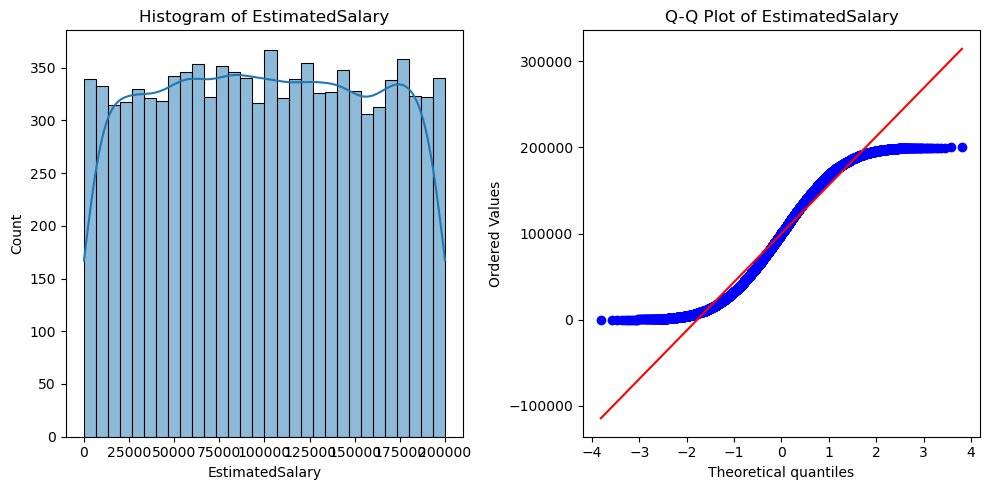

In [99]:
plot_normality_checks(df, 'EstimatedSalary') 

In [101]:
stat, p = ks_2samp(df['Balance'], np.random.normal(df['Balance'].mean(), df['Balance'].std(), len(df['Balance'])))
print(f"KS Test: Statistics={stat}, p-value={p}")

KS Test: Statistics=0.2508, p-value=1.5949366876132734e-276


----
#### The charts and tests clearly indicate that this feature does not follow a normal distribution.
----

In [223]:
from sklearn.preprocessing import MinMaxScaler

df_original = df.copy()
scaler = MinMaxScaler()
df[['Age', 'Balance', 'EstimatedSalary', 'CreditScore']] = scaler.fit_transform(df[['Age', 'Balance', 'EstimatedSalary', 'CreditScore']])

In [225]:
df.head(7)

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasZeroBalance
0,15634602,Hargrave,0.538,0.324324,2,0.000000,1,1,1,0.506735,1,False,False,False,1
1,15647311,Hill,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,False,True,False,0
2,15619304,Onio,0.304,0.324324,8,0.636357,3,1,0,0.569654,1,False,False,False,0
3,15701354,Boni,0.698,0.283784,1,0.000000,2,0,0,0.469120,0,False,False,False,1
4,15737888,Mitchell,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,False,True,False,0
5,15574012,Chu,0.590,0.351351,8,0.453394,2,1,0,0.748797,1,False,True,True,0
6,15592531,Bartlett,0.944,0.432432,7,0.000000,2,1,1,0.050261,0,False,False,True,1


----
#### Checking for imbalance in the churn column
----

In [229]:
# Checking proportion to control imbalance
df['Exited'].value_counts(normalize=True) * 100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

In [275]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Splitting Data
y = df['Exited']  # Target
X = df.drop(columns=['Exited','CustomerId', 'Surname'])  # Features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

# Applying SMOTEENN
smoteenn = SMOTEENN()
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

----
#### Saving data to use in other notebooks
----

In [269]:
%store df_original

Stored 'df_original' (DataFrame)


In [271]:
%store df

Stored 'df' (DataFrame)


In [279]:
%store y

Stored 'y' (Series)


In [281]:
%store X

Stored 'X' (DataFrame)


In [283]:
%store X_train

Stored 'X_train' (DataFrame)


In [285]:
%store X_test

Stored 'X_test' (DataFrame)


In [287]:
%store y_train

Stored 'y_train' (Series)


In [289]:
%store y_test

Stored 'y_test' (Series)


In [291]:
%store X_resampled

Stored 'X_resampled' (DataFrame)


In [293]:
%store y_resampled

Stored 'y_resampled' (Series)


In [301]:
df

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasZeroBalance
0,15634602,Hargrave,0.538,0.324324,2,0.000000,1,1,1,0.506735,1,False,False,False,1
1,15647311,Hill,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,False,True,False,0
2,15619304,Onio,0.304,0.324324,8,0.636357,3,1,0,0.569654,1,False,False,False,0
3,15701354,Boni,0.698,0.283784,1,0.000000,2,0,0,0.469120,0,False,False,False,1
4,15737888,Mitchell,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,0.842,0.283784,5,0.000000,2,1,0,0.481341,0,False,False,True,1
9996,15569892,Johnstone,0.332,0.229730,10,0.228657,1,1,1,0.508490,0,False,False,True,0
9997,15584532,Liu,0.718,0.243243,7,0.000000,1,0,1,0.210390,1,False,False,False,1
9998,15682355,Sabbatini,0.844,0.324324,3,0.299226,2,1,0,0.464429,1,True,False,True,0


In [167]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=250, learning_rate=0.05, random_state=99)
xgb.fit(X_resampled, y_resampled)

y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1593
           1       0.51      0.76      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.84      0.80      0.82      2000

